# Machine Learning Analysis of Titanic

## 1. Import Necessary Library

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## 2. Data Preprocessing

### 2.1 Preview: Overound Understanding of Data 

In [168]:
# use two copy of datas
# the library's file outlines 'read_excel' output is DataFrame type
data = pd.read_excel('titanic.xlsx')
raw_data = pd.read_excel('titanic.xlsx')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


view data's stat info & description

### 2.2 More Detailed: Clear Discription of Data (Types/Null)

In [169]:
print(f'Data Shape: {data.shape}\n')
print(f'Columns: {data.columns}\n')
print(f'Info: {data.info()}\n')
print(f'Describe: {data.describe()}')

Data Shape: (1309, 14)

Columns: Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage

we find that the column `Non-Null Count` assigned: **if the Non-Null Count != data.shape[0]**, it means this feature attribute column **has null value**. like the following columns have null-values, some even has a large amount of null value:
```
- 4   age        1046 non-null   float64
- 8   fare       1308 non-null   float64
- 9   cabin      295 non-null    object 
- 10  embarked   1307 non-null   object
- 11  boat       486 non-null    object
- 12  body       121 non-null    float64
- 13  home.dest  745 non-null    object
```


However, although we know some of the columns have null-values, `but we dont directly cope with these null values`, instead, we make a simple visualization for these data.

### 2.3 Visualization: Count Visualization of Numerical / Categorical Data

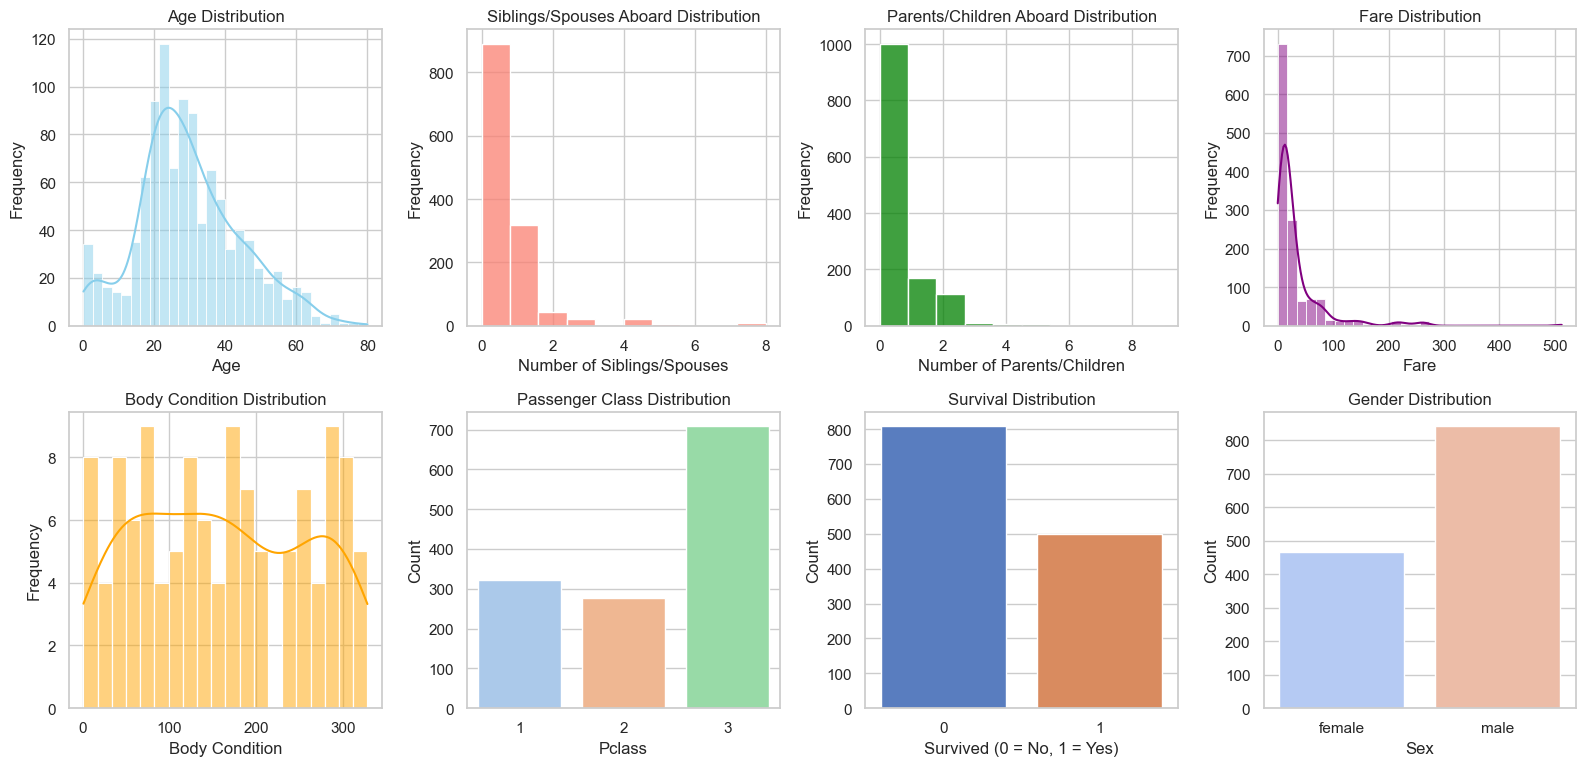

In [170]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 5, figsize=(20, 15))

# age
sns.histplot(data['age'].dropna(), kde=True, bins=30, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# sibps
sns.histplot(data['sibsp'], kde=False, bins=10, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Siblings/Spouses Aboard Distribution')
axes[0, 1].set_xlabel('Number of Siblings/Spouses')
axes[0, 1].set_ylabel('Frequency')

# parch
sns.histplot(data['parch'], kde=False, bins=10, color='green', ax=axes[0, 2])
axes[0, 2].set_title('Parents/Children Aboard Distribution')
axes[0, 2].set_xlabel('Number of Parents/Children')
axes[0, 2].set_ylabel('Frequency')


# fare
sns.histplot(data['fare'], kde=True, bins=30, color='purple', ax=axes[0, 3])
axes[0, 3].set_title('Fare Distribution')
axes[0, 3].set_xlabel('Fare')
axes[0, 3].set_ylabel('Frequency')

# body
sns.histplot(data['body'].dropna(), kde=True, bins=20, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Body Condition Distribution')
axes[1, 0].set_xlabel('Body Condition')
axes[1, 0].set_ylabel('Frequency')

# pclass
sns.countplot(x='pclass', data=data, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Passenger Class Distribution')
axes[1, 1].set_xlabel('Pclass')
axes[1, 1].set_ylabel('Count')

# survived
sns.countplot(x='survived', data=data, palette='muted', ax=axes[1, 2])
axes[1, 2].set_title('Survival Distribution')
axes[1, 2].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[1, 2].set_ylabel('Count')

# sex
sns.countplot(x='sex', data=data, palette='coolwarm', ax=axes[1, 3])
axes[1, 3].set_title('Gender Distribution')
axes[1, 3].set_xlabel('Sex')
axes[1, 3].set_ylabel('Count')

for ax in axes.flat:
    if not ax.has_data():
        ax.set_visible(False)

plt.tight_layout()
plt.show()


### 2.4 Analysis on Visualization: Make Explaination of Graph

- `Age`: most of passengers are centred on age:  **16~35**

- `Number of Siblings`: most of them is **the only traveler, not accompany with their own brothers or sisters** aboard. (Ops, it maybee a bit sad, cuz the loss take away the joyful and happiness of the whole family, what a pity tbh)

- `Number of Parents`: most of them is **the only traveler, not accompany with their own parents or children**, it means **most of them are couple!**

- `Fare`: most of them pay a low-price ticket to get aboard. (just like the Movie shown, similar as Jack hah)

- `Body Condition`: body weight (/lb), the distribution is balanced and most of them are centered on range 50lb~200+lb

- `Pclass`: the First Class / Second Class / Third Class (amazingly to find that there are more First Class than the Second Class instead)

- `Survived`: the **target value column**, it breaks the previous cognition of my childhoold that 'most of the people in Titanic died', cuz the first impression left by the Movie 'The Titanic'. **But according to stat info, near up to 40% of people survived**

- `Sex`: the male is near 65%

### 2.5 Feature Selection and Dimension Reduction

we know the raw data shape is `(1309, 14)`, that's not a huge dataset in fact. But we notice that **some of the features may be not that helpful for model training**. Or **some data's null ratio is high**. 

<mark>**Feature Selection**</mark>

We need to select necessary features as fellows:
```python
# (col drop) drop some columns
data = data.drop(columns = [__columnsToDrop__])

# (row drop) combined condition to judge the row 
data = data.dropna(subset=[__columnsToDrop__], how='all')
```

- Drop some `unnecessary or empty-main` columns

- Drop rows: cuz **cabin & age** are both important factor for survival rate. `drop if a single miss both of these important features`

In [171]:
print(f'Raw Data Shape: {data.shape}\n')
print(f'Columns: {data.columns}\n')
data = data.drop(columns = ['survived', 'name', 'ticket', 'body', 'home.dest', 'embarked'])

print(f'Droped Data Shape: {data.shape}\n')
print(f'Cleaned Data: {data.columns}')

data = data.dropna(subset=['cabin', 'age'], how='all')
raw_data = raw_data.dropna(subset=['cabin', 'age'], how='all')

print('---' * 28)

Raw Data Shape: (1309, 14)

Columns: Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Droped Data Shape: (1309, 8)

Cleaned Data: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'boat'], dtype='object')
------------------------------------------------------------------------------------


In [172]:
print(data.head(), '\n')
print(data.shape)

   pclass     sex      age  sibsp  parch      fare    cabin boat
0       1  female  29.0000      0      0  211.3375       B5    2
1       1    male   0.9167      1      2  151.5500  C22 C26   11
2       1  female   2.0000      1      2  151.5500  C22 C26  NaN
3       1    male  30.0000      1      2  151.5500  C22 C26  NaN
4       1  female  25.0000      1      2  151.5500  C22 C26  NaN 

(1069, 8)


### 2.6 NULL Value Processing

after data feature selection, we need to find `null value` and process with it.

In [173]:
null_col = list()
container = list()

for i in list(data.columns):
    # print(i)
    if data[i].isna().any() == True:
        null_col.append(i)        
        
print(f'Orinal Has Null Col: {null_col}')

# using mode value to fill up
for col in list(data.columns):
    # print(data[col].mode())
    # avg = data[col].mode()[0]
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

for i in list(data.columns):
    # print(i)
    if data[i].isna().any() == True:
        container.append(i)        
        
print(f'Processed Has Null Col: {container}')

Orinal Has Null Col: ['age', 'fare', 'cabin', 'boat']
Processed Has Null Col: []


but sadly, when I check in the data, I found **some error in `boat` column**, like some input are '14 15 B', 'B'.... It means some `Non-Numeric Data involved Numeric Column` (Code is following the encoding part)

now, after we fill the NULL value with its `mode-filled` of responding column, we get as fellows:
```python
# means no Nll Col, all the Col have no null value
Processed Has Null Col: []
```

### 2.7 Encoding of Categorical Data

most of the Categorical Data can't be directly used in Model Learning Model, so `transform Categorical Data --> Numeric Data`

- `(1) One Hot-Encoding`: For a certain feature, it has many categorical types. For this certain feature, we make Binary Encoding for these types. **Create multiple new columns, each column stands for a certain type of certain feature**

    - the following image, we can see **three new columns were born**, (if we have more categorical features, that means more types. So more new columns will be genrated)

![one_hot_encoding](one_hot_encoding.png)

        - understand how to assign a certain categorical type
![one_hot_encoding_1](one_hot_encoding_1.png)


- `(2) Label Encoding`: Direct label by **0/1/2/3/4/...**


- `(3) Binary Encoding`: advanced One Hot-Encoding, can reduce the data dimension
![one_hot_encoding_1](binary_encoding.png)

In [174]:
# data encoding
# it use one hot-encoind
data_encoded = pd.get_dummies(
    data, columns=['sex', 'cabin']
    )

print(data_encoded)

      pclass      age  sibsp  parch      fare boat  sex_female  sex_male  \
0          1  29.0000      0      0  211.3375    2        True     False   
1          1   0.9167      1      2  151.5500   11       False      True   
2          1   2.0000      1      2  151.5500   15        True     False   
3          1  30.0000      1      2  151.5500   15       False      True   
4          1  25.0000      1      2  151.5500   15        True     False   
...      ...      ...    ...    ...       ...  ...         ...       ...   
1301       3  45.5000      0      0    7.2250   15       False      True   
1304       3  14.5000      1      0   14.4542   15        True     False   
1306       3  26.5000      0      0    7.2250   15       False      True   
1307       3  27.0000      0      0    7.2250   15       False      True   
1308       3  29.0000      0      0    7.8750   15       False      True   

      cabin_A10  cabin_A11  ...  cabin_F E57  cabin_F E69  cabin_F G63  \
0         Fal

using `One Hot-Encoding`, and found that data dimension is improving! Turn into `higher dimension`: [[1069 rows x 194 columns]]

In [175]:
# found new generated columns
data_encoded[['cabin_F2', 'cabin_F33', 'cabin_F38', 'cabin_F4']].head()

,cabin_F2,cabin_F33,cabin_F38,cabin_F4
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [176]:
# some error in `boat` column, like some input are '14 15 B', 'B'.... It means some `Non-Numeric Data involved Numeric Column`

data_encoded['boat'] = pd.to_numeric(data['boat'], errors='coerce')
# data_encoded['boat'].head(30)

mean1 = data_encoded['boat'].mean()
data_encoded['boat'] = data_encoded['boat'].fillna(mean1)

data_encoded['boat'].head(10)

0     2.000000
1    11.000000
2    15.000000
3    15.000000
4    15.000000
5     3.000000
6    10.000000
7    15.000000
8    12.872128
9    15.000000
Name: boat, dtype: float64

### 2.8 Overview of Processed Data

In [177]:
# choose the first 6 columns
# cuz the fellowing columns are both new generated columns for One Hot-Encoding
for i in list(data_encoded.columns)[0:6]:
    print(f'{i}: {(set(data[i]))}\n')
    
# data_encoded.head()

pclass: {1, 2, 3}

age: {0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 18.5, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.5, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 32.5, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 60.5, 70.0, 71.0, 70.5, 14.5, 74.0, 76.0, 80.0, 20.0, 20.5, 22.5, 23.5, 24.5, 0.3333, 26.5, 30.5, 34.0, 34.5, 36.5, 38.5, 40.5, 45.5, 0.9167, 0.8333, 0.6667, 55.5, 11.5, 0.1667, 0.4167}

sibsp: {0, 1, 2, 3, 4, 5, 8}

parch: {0, 1, 2, 3, 4, 5, 6}

fare: {0.0, 512.3292, 3.1708, 4.0125, 5.0, 6.75, 7.55, 7.65, 9.6875, 10.5, 11.5, 12.525, 13.0, 13.5, 13.8583, 14.5, 16.0, 12.275, 15.0, 13.7917, 21.0, 15.0458, 23.0, 24.0, 25.5875, 26.3875, 27.75, 28.5, 28.7125, 26.0, 26.55, 27.7208, 26.2875, 30.0, 31.0, 30.5, 29.7, 35.5, 31.6792, 38.5, 39.6, 34.6542, 42.5, 39.4, 45.5, 42

luckily, we all successfully cope with data preprocessing, now no Null value or illegal value exist!

### 2.9 Data Scaling

for a better control in Gradient Descent, (for a better grad value computation and a more balanced grad leading guidance). `Data Scaling has better control & convergence in gradient compuation` (faster + stable + more balanced)

Tips:
- 1. Scaling used in **Numeric** Data
- 2. Scaling used in **X**, but **not y**

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = data_encoded.copy()

# choosing numeric columns, 
# the target column does't need to!
data_standardized[['age', 'sibsp', 'parch', 'fare', 'boat']] = scaler.fit_transform(data_standardized[['age', 'sibsp', 'parch', 'fare', 'boat']])

print(data_standardized.shape)
data_standardized.head()

(1069, 194)


,pclass,age,sibsp,parch,fare,boat,sex_female,sex_male,cabin_A10,cabin_A11,...,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
0,1,-0.052857,-0.548962,-0.496538,3.140614,-2.943948,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,-2.019983,0.556199,1.905267,2.064310,-0.506934,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,-1.944102,0.556199,1.905267,2.064310,0.576184,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.017189,0.556199,1.905267,2.064310,0.576184,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,-0.333041,0.556199,1.905267,2.064310,0.576184,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3. Model Preparation

### 3.1 Dataset Split

In [179]:
# Split data
from sklearn.model_selection import train_test_split

print(f'Raw Data Shape: {data.shape}')
X_train, X_test, y_train, y_test = train_test_split(
    data_standardized, 
    raw_data['survived'],
    test_size = 0.2, random_state = 42
)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

Raw Data Shape: (1069, 8)
X_train.shape: (855, 194)
y_train.shape: (855,)
X_test.shape: (214, 194)
y_test.shape: (214,)


### 3.2 Model Initialization

`Simple Bianry Classification Problem --> Logistic Model`

- Logistic Model with L1 Regularization
- Logistic Model with L2 Regularization

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Using L1 Regularization 
# init the model
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42)

###############################################################################

# Using L2 regularization
# init the model
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000, random_state=42)

print(f'Model1: {model_l1}\n')
print(f'Model2: {model_l2}')

Model1: LogisticRegression(max_iter=5000, penalty='l1', random_state=42, solver='saga')

Model2: LogisticRegression(max_iter=5000, random_state=42)


### 3.3 Model Training

In [181]:
# training the Model
print(model_l1.fit(X_train, y_train))
print(model_l2.fit(X_train, y_train))
model_l1

LogisticRegression(max_iter=5000, penalty='l1', random_state=42, solver='saga')
LogisticRegression(max_iter=5000, random_state=42)


LogisticRegression(max_iter=5000, penalty='l1', random_state=42, solver='saga')

### 3.4 Model Prediction

In [182]:
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)

# show one of pred result
y_pred_l1

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

### 3.5 Model Evaluation (Quantitative Statistics)

In [183]:
# acr print out 
# Calculate the accuracy of the model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"- Accuracy with L1 regularization: {accuracy_l1*100:.4f}%")

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"- Accuracy with L2 regularization: {accuracy_l2*100:.4f}%\n")

print('---'*18)
# Calculate other metrics: precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

prec_l1 = precision_score(y_test, y_pred_l1)
recall_l1 = recall_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

prec_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print("\nL1 Regularization Model:")
print(f"- Precision: {prec_l1:.4f}")
print(f"- Recall: {recall_l1:.4f}")
print(f"- F1 Score: {f1_l1:.4f}\n")

print("L2 Regularization Model:")
print(f"- Precision: {prec_l2:.4f}")
print(f"- Recall: {recall_l2:.4f}")
print(f"- F1 Score: {f1_l2:.4f}\n")

print('---'*18)

# print out classification report
from sklearn.metrics import classification_report

print('\nL1 Regularization Model Report:\n', classification_report(
    y_test, y_pred_l1, 
    target_names=['Survived', 'Death'])
      )

print('---' * 18)
print('\nL2 Regularization Model Report:\n', classification_report(
    y_test, y_pred_l2, 
    target_names=['Survived', 'Death'])
      )

- Accuracy with L1 regularization: 92.5234%
- Accuracy with L2 regularization: 92.0561%

------------------------------------------------------

L1 Regularization Model:
- Precision: 0.9870
- Recall: 0.8352
- F1 Score: 0.9048

L2 Regularization Model:
- Precision: 0.9868
- Recall: 0.8242
- F1 Score: 0.8982

------------------------------------------------------

L1 Regularization Model Report:
               precision    recall  f1-score   support

    Survived       0.89      0.99      0.94       123
       Death       0.99      0.84      0.90        91

    accuracy                           0.93       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.93      0.92       214

------------------------------------------------------

L2 Regularization Model Report:
               precision    recall  f1-score   support

    Survived       0.88      0.99      0.93       123
       Death       0.99      0.82      0.90        91

    accuracy          

### 3.6 Model Evaluation (Visualization)

#### Plot 1: Confusion Matrix

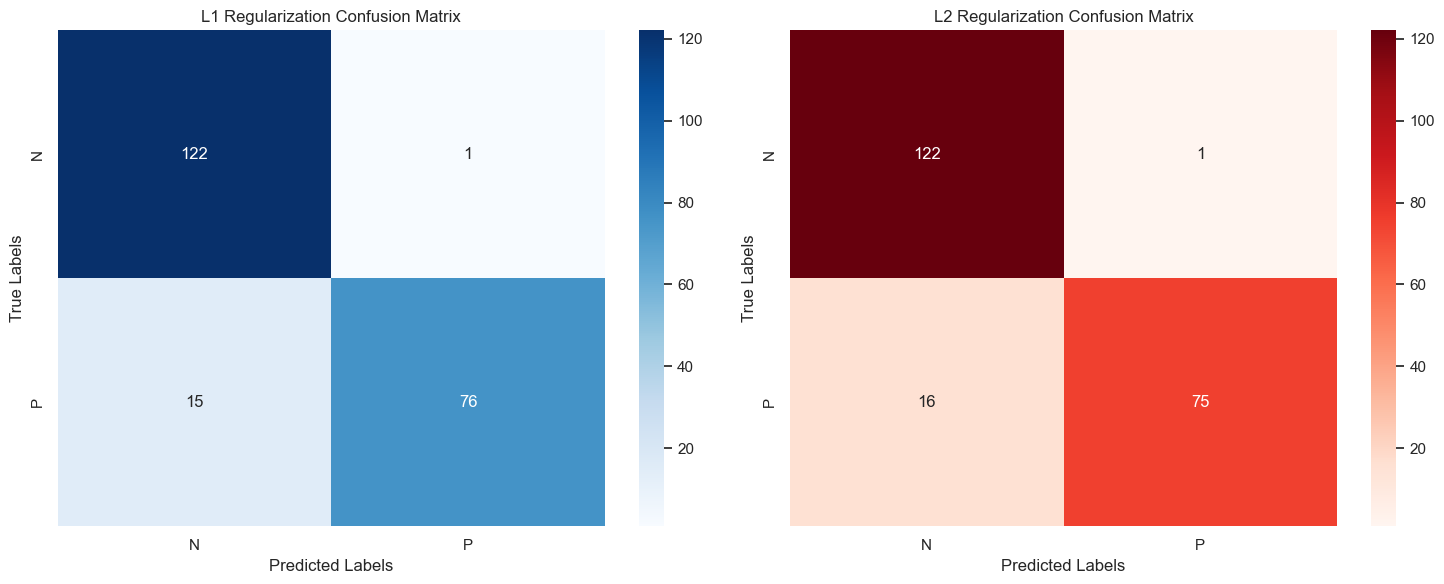

In [184]:
# Generate a confusion matrix and visualize it
from sklearn.metrics import confusion_matrix

# compute the matrix
matrixs_l1 = confusion_matrix(y_test, y_pred_l1)
matrixs_l2 = confusion_matrix(y_test, y_pred_l2)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# sub plotting
sns.heatmap(matrixs_l1, annot=True, fmt='g', cmap='Blues', ax=axes[0], xticklabels=['N', 'P'], yticklabels=['N', 'P'])
axes[0].set_title('L1 Regularization Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(matrixs_l2, annot=True, fmt='g', cmap='Reds', ax=axes[1], xticklabels=['N', 'P'], yticklabels=['N', 'P'])
axes[1].set_title('L2 Regularization Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

#### Plot 2: ROC Curve

`About ROC`
- the curve **more near upper left**, the **better model performs** 
- `AUC`: Area Under the Curve, the value determines good / bad the model performs (positive relationship)

    - AUC = 0.5: model preforms random prediction simulation
    - AUC = 1: the most perfect model (**threshold level**)
    - AUC < 0.5: worst than random prediction

- Advantage: fit for unbalanced data distribution `(performs well in class imbalance)`

<p style="text-align:center;">
  <img src="Roc_curve.png" width="300" />
</p>



[[6.92758810e-01 3.07241190e-01]
 [2.44841148e-07 9.99999755e-01]
 [6.03871558e-01 3.96128442e-01]]

 [[6.77569240e-01 3.22430760e-01]
 [1.90215880e-05 9.99980978e-01]
 [5.65745607e-01 4.34254393e-01]]


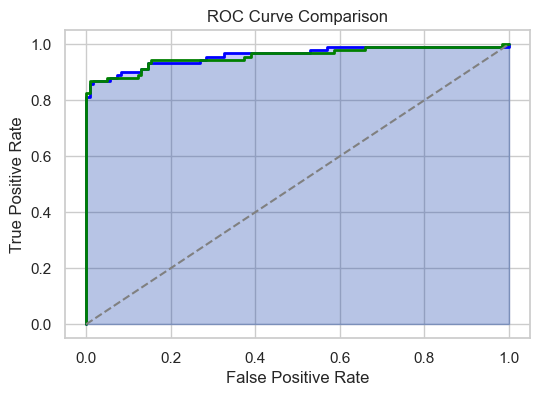

In [185]:
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, auc

# prob transformation
y_pred_l1_prob = model_l1.predict_proba(X_test)[:, 1]
print(model_l1.predict_proba(X_test)[:3])

y_pred_l2_prob = model_l2.predict_proba(X_test)[:, 1]
print('\n', model_l2.predict_proba(X_test)[:3])

fpr_l1, tpr_l1, _ = roc_curve(y_test, y_pred_l1_prob)
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_pred_l2_prob)

# calculate the AUC
roc_auc_l1 = auc(fpr_l1, tpr_l1)
roc_auc_l2 = auc(fpr_l2, tpr_l2)

plt.figure(figsize=(6, 4))

# ROC L1
plt.plot(fpr_l1, tpr_l1, color='blue', lw=2, label=f'L1 Regularization (AUC = {roc_auc_l1:.2f})')
plt.fill_between(fpr_l1, tpr_l1, color='blue', alpha=0.2)

# ROC L2
plt.plot(fpr_l2, tpr_l2, color='green', lw=2, label=f'L2 Regularization (AUC = {roc_auc_l2:.2f})')
plt.fill_between(fpr_l2, tpr_l2, color='green', alpha=0.1)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

```
L1 Regularization Model Report:
               precision    recall  f1-score   support

    Survived       0.89      0.99      0.94       123
       Death       0.99      0.84      0.90        91

    accuracy                           0.93       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.93      0.92       214

------------------------------------------------------

L2 Regularization Model Report:
               precision    recall  f1-score   support

    Survived       0.88      0.99      0.93       123
       Death       0.99      0.82      0.90        91

    accuracy                           0.92       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.92      0.92       214
```

So, for L1 is better <span style="background-color: yellow;">Choosing L1 Regularization</span>

---

## 4. Model Optimization

### 4.1 Hyperparameter Tuning

- `Hyperparameters`: are parameters that need to be manually set before training in machine learning models, such as the maximum depth of decision trees, the C value of support vector machines, etc.

- `Grid Search`: refers to traversing the specified hyperparameter space, training and validating each set of hyperparameter combinations, and finding the best hyperparameter combination.

- `Cross Validation (CV)`: is a technique for evaluating model performance, dividing the data into multiple subsets, each subset is used as a validation set in turn, and the rest are used as training sets, thereby reducing performance fluctuations caused by different data divisions

<p style="text-align:center;">
  <img src="grid_search.png" width="306" style="display: inline-block; margin-right: 20px;" />
  <img src="Using-GridSearch-Technique-to-Determine-Hyperparameters-in-XGBoost-Learning-Method.png" width="300" style="display: inline-block;" />
</p>


#### Method 1: Grid Search (CV)

In [186]:
# Use ‘GridSearchCV’ or ‘RandomizedSearchCV’ to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# choosing model with L1 Regularization
# model_l1

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000],
    'tol': [1e-3, 1e-1],
    'class_weight': ['balanced']  # 自动调整类别权重
}

grid_search = GridSearchCV(estimator=model_l1, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyper param:\n", grid_search.best_params_)

Best hyper param:
 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


In [187]:
# aggisn the state_dict into the model
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga', tol=0.001)

In [188]:
y_pred_best = best_model.predict(X_test)

print('Best Model Report:\n', classification_report(
    y_test, y_pred_best, 
    target_names=['Survived', 'Death'])
      )

y_pred_best_prob = best_model.predict_proba(X_test)[:, 1]
# print(best_model.predict_proba(X_test)[:3])

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best_prob)

# calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)

Best Model Report:
               precision    recall  f1-score   support

    Survived       0.89      0.99      0.94       123
       Death       0.99      0.84      0.90        91

    accuracy                           0.93       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.93      0.92       214



Best Model Report (Grid Search):
               precision    recall  f1-score   support

    Survived       0.89      0.99      0.94       123
       Death       0.99      0.84      0.90        91

    accuracy                           0.93       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.93      0.92       214

------------------------------------------------------------

Previous Model Report:
               precision    recall  f1-score   support

    Survived       0.88      0.99      0.93       123
       Death       0.99      0.82      0.90        91

    accuracy                           0.92       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.92      0.92       214



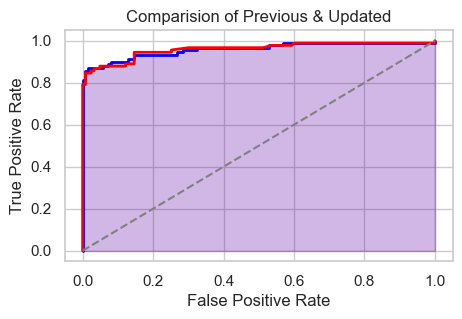

In [189]:
# Evaluate the model with the best parameters on the test set

# Best Model
y_pred_best = best_model.predict(X_test)

print('Best Model Report (Grid Search):\n', classification_report(
    y_test, y_pred_best, 
    target_names=['Survived', 'Death'])
      )

print('---' * 20)
print()
y_pred_best_prob = best_model.predict_proba(X_test)[:, 1]
# print(best_model.predict_proba(X_test)[:3])

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_best_prob)

# calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)

########################################################################

# Previous Model
print('Previous Model Report:\n', classification_report(
    y_test, y_pred_l2, 
    target_names=['Survived', 'Death'])
      )

# plotting
plt.figure(figsize=(5, 3))

# ROC L1
plt.plot(fpr_l1, tpr_l1, color='blue', lw=2, label=f'Previous Regularization (AUC = {roc_auc_l2:.2f})')
plt.fill_between(fpr_l1, tpr_l1, color='blue', alpha=0.2)

plt.plot(fpr_best, tpr_best, color='red', lw=2, label=f'Best Regularization (AUC = {roc_auc_best:.2f})')
plt.fill_between(fpr_best, tpr_best, color='red', alpha=0.1)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Comparision of Previous & Updated')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

---
#### Method 2: RandomizedSearchCV

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# choosing model with L1 Regularization
# model_l1

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.01, 100),  # Uniform distribution for C (from 0.01 to 100)
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000],
    'tol': uniform(1e-3, 1e-1),  # Random distribution for tolerance
    'class_weight': ['balanced']  # Automatically adjust class weights
}

# Using RandomizedSearchCV with 5-fold cross-validation and n_jobs=-1 for parallel processing
random_search = RandomizedSearchCV(estimator=model_l1, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyper parameters:\n", random_search.best_params_)

Best hyper parameters:
 {'C': 72.83163486118596, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.06423058305935796}


In [191]:
best_model1 = random_search.best_estimator_
best_model1

LogisticRegression(C=72.83163486118596, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear',
                   tol=0.06423058305935796)

Best Model Report (Random Search):
               precision    recall  f1-score   support

    Survived       0.91      0.98      0.94       123
       Death       0.96      0.87      0.91        91

    accuracy                           0.93       214
   macro avg       0.94      0.92      0.93       214
weighted avg       0.93      0.93      0.93       214

------------------------------------------------------------

Previous Model Report:
               precision    recall  f1-score   support

    Survived       0.89      0.99      0.94       123
       Death       0.99      0.84      0.90        91

    accuracy                           0.93       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.93      0.93      0.92       214



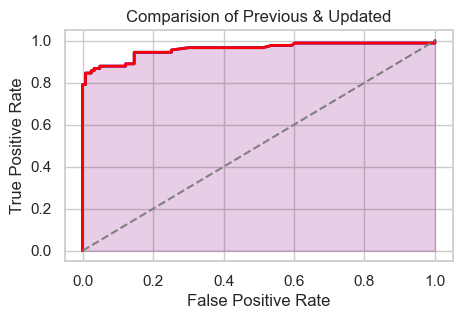

In [192]:
# Evaluate the model with the best parameters on the test set

# Best Model
y_pred_best1 = best_model1.predict(X_test)

print('Best Model Report (Random Search):\n', classification_report(
    y_test, y_pred_best1, 
    target_names=['Survived', 'Death'])
      )

print('---' * 20)
print()
y_pred_best_prob1 = best_model.predict_proba(X_test)[:, 1]
# print(best_model.predict_proba(X_test)[:3])

fpr_best1, tpr_best1, _ = roc_curve(y_test, y_pred_best_prob1)

# calculate the AUC
roc_auc_best1 = auc(fpr_best1, tpr_best1)

########################################################################

# Previous Model
print('Previous Model Report:\n', classification_report(
    y_test, y_pred_l1, 
    target_names=['Survived', 'Death'])
      )

# plotting
plt.figure(figsize=(5, 3))

# ROC Grid Search
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label=f'Best Regularization (AUC = {roc_auc_best:.2f})')
plt.fill_between(fpr_best, tpr_best1, color='blue', alpha=0.1)

plt.plot(fpr_best1, tpr_best1, color='red', lw=2, label=f'Best Regularization (AUC = {roc_auc_best1:.2f})')
plt.fill_between(fpr_best1, tpr_best1, color='red', alpha=0.1)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Comparision of Previous & Updated')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

so, no obvious improvement for Random Search...

---

## 5. Model Deployment

### 5.1 Model Saving

In [193]:
import joblib

# save the model into a file
joblib.dump(best_model, 'titanic_analysis.pkl')

['titanic_analysis.pkl']

### 5.2 Model Deployment using Function to Implement

```python
# python prediction.py titanic.csv titanic.pkl
predict('titanic.csv', 'titanic_analysis.pkl')
```

In [194]:
def predict(data_path, model_path):
        # pkl as surffix name
        model = joblib.load(model_path)

        # csv file input
        new_data = pd.read_csv(data_path)

        # make prediction
        predictions = model.predict(new_data)

        print(predictions)

In [195]:
# predict('titanic.csv', 'titanic_analysis.pkl')

### 5.3 Command Line Conduction

```predition.py File```

- Run Command By: 
```
python prediction.py titanic.csv titanic.pkl
```

```python
import argparse
import pandas as pd
import joblib

parser = argparse.ArgumentParser(description='Predict data classification using a specified model')

parser.add_argument('input_file', type=str, help='Path to the CSV file for prediction')
parser.add_argument('model_path', type=str, help='Path to the trained model file')

args = parser.parse_args()

# load in command's input
model = joblib.load(args.model_path)
new_data = pd.read_csv(args.input_file)

predictions = model_l1.predict(new_data)

print("Predictions:", predictions)
```